## Dependency Parsing
Dependency Parsing has grammatical structure in a sentence and find out related words as well as the type of the relationship between them.

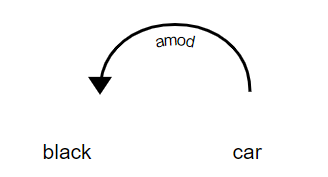

- Above Diagram, there exists a relationship between car and black
- Because black modifies the meaning of car. 
- Here, car acts as the head and black is a dependent of the head.
- The nature of the relationship here is amod which stands for “Adjectival Modifier”.
- It is an adjective or an adjective phrase that modifies a noun.

In [ ]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm
!pip install graphviz
#en_core_web_sm is the smallest English model available in spaCy. others are: 
## en_core_web_sm - 12 mb
## en_core_web_md - 43 Mb
## en_core_web_lg - 735 Mb
## en_core_web_trf - 438 mb(Roberta transformer base)

     |████████████████████████████████| 2.1 MB 7.2 MB/s 
     |████████████████████████████████| 1.1 MB 46.1 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.0/452.0 KB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 KB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.3/653.3 KB 35.2 MB/s eta 0:00:00
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installa

In [ ]:
!pip install graphviz

## Using Spacy

In [ ]:
import spacy
from spacy import displacy

In [ ]:
# Load the language model
nlp = spacy.load("en_core_web_sm")

sentence = 'Deemed universities charge huge fees'

# nlp function returns an object with individual token information, 
# linguistic features and relationships
doc = nlp(sentence)

print("{:<15} | {:<8} | {:<15} | {:<20}".format('Token','Relation','Head', 'Children'))
print("-" * 70)

for token in doc:
  # Print the token, dependency nature, head and all dependents of the token
  print("{:<15} | {:<8} | {:<15} | {:<20}".format(str(token.text), str(token.dep_), str(token.head.text), str([child for child in token.children])))
  
# Use displayCy to visualize the dependency graph for sentences
displacy.render(doc, style='dep', jupyter=True, options={'distance': 120})

Token           | Relation | Head            | Children            
----------------------------------------------------------------------
Deemed          | amod     | universities    | []                  
universities    | nsubj    | charge          | [Deemed]            
charge          | ROOT     | charge          | [universities, fees]
huge            | amod     | fees            | []                  
fees            | dobj     | charge          | [huge]              


## Using Nltk

In [ ]:
## 1 gb Jar files
!wget https://nlp.stanford.edu/software/stanford-corenlp-4.2.2.zip
!wget https://nlp.stanford.edu/software/stanford-corenlp-4.2.2-models-english.jar
!unzip /content/stanford-corenlp-4.2.2.zip

--2022-04-03 00:23:02--  https://nlp.stanford.edu/software/stanford-corenlp-4.2.2.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://downloads.cs.stanford.edu/nlp/software/stanford-corenlp-4.2.2.zip [following]
--2022-04-03 00:23:02--  https://downloads.cs.stanford.edu/nlp/software/stanford-corenlp-4.2.2.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 504278711 (481M) [application/zip]
Saving to: ‘stanford-corenlp-4.2.2.zip’

stanford-corenlp-4. 100%[===================>] 480.92M  5.10MB/s    in 91s     

2022-04-03 00:24:33 (5.31 MB/s) - ‘stanford-corenlp-4.2.2.zip’ saved [504278711/504278711]

--2022-04-03 00:24:33--  https://nlp.st

In [ ]:
from nltk.parse.stanford import StanfordDependencyParser

In [ ]:
# Path to CoreNLP jar unzipped
jar_path = '/content/stanford-corenlp-4.2.2/stanford-corenlp-4.2.2.jar'

# Path to CoreNLP model jar
models_jar_path = '/content/stanford-corenlp-4.2.2-models-english.jar'

sentence = 'Deemed universities charge huge fees'

# Initialize StanfordDependency Parser from the path
parser = StanfordDependencyParser(path_to_jar = jar_path, path_to_models_jar = models_jar_path)

# Parse the sentence
result = parser.raw_parse(sentence)
dependency = result.__next__()

print("{:<15} | {:<10} | {:<10} | {:<15} | {:<10}".format('Head', 'Head POS','Relation','Dependent', 'Dependent POS'))
print("-" * 75)
  
# Use dependency.triples() to extract the dependency triples in the form
# ((head word, head POS), relation, (dependent word, dependent POS))  
for dep in list(dependency.triples()):
  print("{:<15} | {:<10} | {:<10} | {:<15} | {:<10}".format(str(dep[0][0]),str(dep[0][1]), str(dep[1]), str(dep[2][0]),str(dep[2][1])))

Head            | Head POS   | Relation   | Dependent       | Dependent POS
---------------------------------------------------------------------------
charge          | VBP        | nsubj      | universities    | NNS       
universities    | NNS        | compound   | Deemed          | NNP       
charge          | VBP        | obj        | fees            | NNS       
fees            | NNS        | amod       | huge            | JJ        


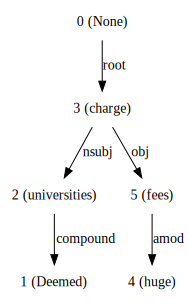

In [ ]:
dependency

## Using Stanza

- Stanza provides a Neural Network NLP Pipeline that can be customized and a Python wrapper over Stanford CoreNLP package.
- These Pretrained on the Universal Dependencies v2.8 datasets (https://universaldependencies.org/)

In [ ]:
!pip install stanza

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.0/432.0 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 KB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=2f9adcda7261eb8cf53f93692908c214a7de6fc19ab540b1709be6645e3597cb
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
import stanza
## for hindi use hi, for punjabi it doesn't exist.
stanza.download('en')

2022-04-03 00:26:11 INFO: Downloading default packages for language: en (English)...


2022-04-03 00:26:25 INFO: Finished downloading models and saved to /root/stanza_resources.


In [ ]:
sentence = 'Deemed universities charge huge fees'

# Build a Neural Pipeline
nlp = stanza.Pipeline('en', processors = "tokenize,mwt,pos,lemma,depparse") 

# Pass the sentence through the pipeline
doc = nlp(sentence)

# Print the dependencies of the first sentence in the doc object
# Format - (Token, Index of head, Nature of dependency)
# Index starts from 1, 0 is reserved for ROOT
doc.sentences[0].print_dependencies()


print("{:<15} | {:<10} | {:<15} ".format('Token', 'Relation', 'Head'))
print("-" * 50)
  
# Convert sentence object to dictionary  
sent_dict = doc.sentences[0].to_dict()

# iterate to print the token, relation and head
for word in sent_dict:
  print("{:<15} | {:<10} | {:<15} ".format(str(word['text']),str(word['deprel']), str(sent_dict[word['head']-1]['text'] if word['head'] > 0 else 'ROOT')))


2022-04-03 00:34:56 WARNING: Can not find mwt: default from official model list. Ignoring it.
2022-04-03 00:34:56 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |
| lemma     | combined |
| depparse  | combined |

2022-04-03 00:34:56 INFO: Use device: cpu
2022-04-03 00:34:56 INFO: Loading: tokenize
2022-04-03 00:34:56 INFO: Loading: pos
2022-04-03 00:34:57 INFO: Loading: lemma
2022-04-03 00:34:57 INFO: Loading: depparse
2022-04-03 00:34:58 INFO: Done loading processors!


('Deemed', 2, 'amod')
('universities', 3, 'nsubj')
('charge', 0, 'root')
('huge', 5, 'amod')
('fees', 3, 'obj')
Token           | Relation   | Head            
--------------------------------------------------
Deemed          | amod       | universities    
universities    | nsubj      | charge          
charge          | root       | ROOT            
huge            | amod       | fees            
fees            | obj        | charge          


## Spacy Stanza

In [ ]:
!pip install spacy-stanza

In [ ]:
import stanza
import spacy_stanza
stanza.download("en")
nlp = spacy_stanza.load_pipeline("en")

2022-04-03 00:35:11 INFO: Downloading default packages for language: en (English)...
2022-04-03 00:35:14 INFO: File exists: /root/stanza_resources/en/default.zip.
2022-04-03 00:35:23 INFO: Finished downloading models and saved to /root/stanza_resources.
2022-04-03 00:35:23 INFO: Loading these models for language: en (English):
| Processor    | Package   |
----------------------------
| tokenize     | combined  |
| pos          | combined  |
| lemma        | combined  |
| depparse     | combined  |
| sentiment    | sstplus   |
| constituency | wsj       |
| ner          | ontonotes |

2022-04-03 00:35:23 INFO: Use device: cpu
2022-04-03 00:35:23 INFO: Loading: tokenize
2022-04-03 00:35:23 INFO: Loading: pos
2022-04-03 00:35:23 INFO: Loading: lemma
2022-04-03 00:35:23 INFO: Loading: depparse
2022-04-03 00:35:24 INFO: Loading: sentiment
2022-04-03 00:35:25 INFO: Loading: constituency
2022-04-03 00:35:25 INFO: Loading: ner
2022-04-03 00:35:26 INFO: Done loading processors!


In [ ]:
doc = nlp("Deemed universities charge huge fees")
print("{:<15} | {:<8} | {:<15} | {:<20}".format('Token','Relation','Head', 'Children'))
print("-" * 70)

for token in doc:
  # Print the token, dependency nature, head and all dependents of the token
  print("{:<15} | {:<8} | {:<15} | {:<20}".format(str(token.text), str(token.dep_), str(token.head.text), str([child for child in token.children])))

# Use displayCy to visualize the dependency graph for sentences
displacy.render(doc, style='dep', jupyter=True, options={'distance': 120})

Token           | Relation | Head            | Children            
----------------------------------------------------------------------
Deemed          | amod     | universities    | []                  
universities    | nsubj    | charge          | [Deemed]            
charge          | root     | charge          | [universities, fees]
huge            | amod     | fees            | []                  
fees            | obj      | charge          | [huge]              


## Treebank Evaluation

In [ ]:
## penn treebank dataset
!wget https://data.deepai.org/ptbdataset.zip
!unzip /content/ptbdataset.zip -d ptbdataset

--2022-04-03 00:35:27--  https://data.deepai.org/ptbdataset.zip
Resolving data.deepai.org (data.deepai.org)... 138.201.36.183
Connecting to data.deepai.org (data.deepai.org)|138.201.36.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4568253 (4.4M) [application/x-zip-compressed]
Saving to: ‘ptbdataset.zip’

ptbdataset.zip      100%[===================>]   4.36M  4.35MB/s    in 1.0s    

2022-04-03 00:35:28 (4.35 MB/s) - ‘ptbdataset.zip’ saved [4568253/4568253]

Archive:  /content/ptbdataset.zip
  inflating: ptbdataset/README       
  inflating: ptbdataset/ptb.char.test.txt  
  inflating: ptbdataset/ptb.char.train.txt  
  inflating: ptbdataset/ptb.char.valid.txt  
  inflating: ptbdataset/ptb.test.txt  
  inflating: ptbdataset/ptb.train.txt  
  inflating: ptbdataset/ptb.valid.txt  


In [ ]:
## Universal dependency dataset
!wget https://lindat.mff.cuni.cz/repository/xmlui/bitstream/handle/11234/1-4611/ud-treebanks-v2.9.tgz

--2022-04-03 00:35:29--  https://lindat.mff.cuni.cz/repository/xmlui/bitstream/handle/11234/1-4611/ud-treebanks-v2.9.tgz
Resolving lindat.mff.cuni.cz (lindat.mff.cuni.cz)... 195.113.20.140
Connecting to lindat.mff.cuni.cz (lindat.mff.cuni.cz)|195.113.20.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 463076751 (442M) [application/x-gzip]
Saving to: ‘ud-treebanks-v2.9.tgz’

ud-treebanks-v2.9.t 100%[===================>] 441.62M  18.5MB/s    in 25s     

2022-04-03 00:35:55 (17.6 MB/s) - ‘ud-treebanks-v2.9.tgz’ saved [463076751/463076751]



In [ ]:
!tar -xvzf /content/ud-treebanks-v2.9.tgz

ud-treebanks-v2.9/
ud-treebanks-v2.9/UD_Faroese-OFT/
ud-treebanks-v2.9/UD_Faroese-OFT/README.md
ud-treebanks-v2.9/UD_Faroese-OFT/fo_oft-ud-test.conllu
ud-treebanks-v2.9/UD_Faroese-OFT/LICENSE.txt
ud-treebanks-v2.9/UD_Faroese-OFT/stats.xml
ud-treebanks-v2.9/UD_Faroese-OFT/fo_oft-ud-test.txt
ud-treebanks-v2.9/UD_French-FQB/
ud-treebanks-v2.9/UD_French-FQB/README.md
ud-treebanks-v2.9/UD_French-FQB/LICENSE.txt
ud-treebanks-v2.9/UD_French-FQB/stats.xml
ud-treebanks-v2.9/UD_French-FQB/fr_fqb-ud-test.txt
ud-treebanks-v2.9/UD_French-FQB/fr_fqb-ud-test.conllu
ud-treebanks-v2.9/UD_Bambara-CRB/
ud-treebanks-v2.9/UD_Bambara-CRB/bm_crb-ud-test.conllu
ud-treebanks-v2.9/UD_Bambara-CRB/LICENSE.txt
ud-treebanks-v2.9/UD_Bambara-CRB/stats.xml
ud-treebanks-v2.9/UD_Bambara-CRB/bm_crb-ud-test.txt
ud-treebanks-v2.9/UD_Bambara-CRB/README.md
ud-treebanks-v2.9/UD_Old_East_Slavic-RNC/
ud-treebanks-v2.9/UD_Old_East_Slavic-RNC/orv_rnc-ud-train.conllu
ud-treebanks-v2.9/UD_Old_East_Slavic-RNC/orv_rnc-ud-train.txt
ud

In [ ]:
cp -R /content/ud-treebanks-v2.9/UD_English-Atis /content

In [ ]:
## official evaluation script
!wget http://universaldependencies.org/conll17/eval.zip
!unzip /content/eval.zip -d eval

--2022-04-03 00:36:19--  http://universaldependencies.org/conll17/eval.zip
Resolving universaldependencies.org (universaldependencies.org)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to universaldependencies.org (universaldependencies.org)|185.199.108.153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7056 (6.9K) [application/zip]
Saving to: ‘eval.zip’

eval.zip            100%[===================>]   6.89K  --.-KB/s    in 0s      

2022-04-03 00:36:19 (551 MB/s) - ‘eval.zip’ saved [7056/7056]

Archive:  /content/eval.zip
  inflating: eval/evaluation_script/conll17_ud_eval.py  
  inflating: eval/evaluation_script/weights.clas  


In [ ]:
## spacy evaluation script
!git clone https://github.com/explosion/projects.git

Cloning into 'projects'...
remote: Enumerating objects: 3530, done.
remote: Counting objects: 100% (577/577), done.
remote: Compressing objects: 100% (268/268), done.
remote: Total 3530 (delta 398), reused 354 (delta 305), pack-reused 2953
Receiving objects: 100% (3530/3530), 13.56 MiB | 16.57 MiB/s, done.
Resolving deltas: 100% (2172/2172), done.


In [ ]:
!pip install spacy_conll
# !pip install spacy-stanza

In [ ]:
# file1 = open('/content/UD_English-Atis/en_atis-ud-test.txt','r').read()

In [ ]:
# '.'.join(file1.split('\n')[:20])
open('/content/UD_English-Atis/en_atis-ud-test.txt','r').read()

"what are the coach flights between dallas and baltimore leaving august tenth and\nreturning august twelve i want a flight from nashville to seattle that arrives\nno later than 3 pm i need a flight leaving kansas city to chicago leaving next\nwednesday and returning the following day explain meal codes sd d show me all\nflights from atlanta to san francisco which leave the day after tomorrow after 5\no'clock pm i need a flight from toronto to montreal reaching montreal early on\nfriday are there any flights from new york to montreal canada leaving on\nthursday show me ground transportation in philadelphia on monday morning find a\nflight from toronto to san diego with a layover in dc on delta airlines what is\nrestriction ap80 list the arizona airport what are the nonstop flights on\namerica west or southwest air from kansas city to burbank on saturday may twenty\ntwo what times does the late afternoon flight leave from washington for denver\nwhat does the meal code s stand for is ther

In [ ]:
file1 = open('/content/UD_English-Atis/en_atis-ud-test.txt','r').read()
about_text = '.'.join(file1.split('\n'))
about_doc = nlp(about_text)
conll = about_doc._.conll_str
# print(conll)

AttributeError: ignored

In [ ]:
file1 = open('/content/ud-test.conllu', 'w')
# Writing a string to file
file1.write(conll)
file1.close()


In [ ]:
!python /content/eval/evaluation_script/conll17_ud_eval.py
# '/content/eval/evaluation_script/weights.clas'
# gold_ud = load_conllu_file('/content/UD_English-Atis/en_atis-ud-test.conllu')
# system_ud = load_conllu_file('/content/UD_English-Atis/en_atis-ud-test.conllu')

In [ ]:
## https://explosion.ai/blog/ud-benchmarks-v3-2